# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
import pandas as pd
# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata('MNIST original')
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score

mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [2]:
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [4]:
X.iloc[36000]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 36000, Length: 784, dtype: float64

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

In [5]:
import matplotlib.pyplot as plt
X_36000 = np.array(X.loc[36000])

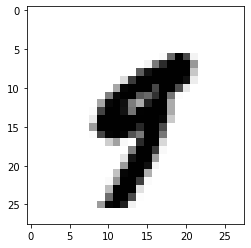

In [6]:
fig, ax = plt.subplots()
ax.imshow(X_36000.reshape(28,28), cmap=plt.cm.binary, interpolation="nearest")

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [7]:
y.loc[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [8]:
X_train, y_train = X[:60000], y[:60000]
X_test, y_test = X[60000:], y[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [9]:
from sklearn.model_selection import train_test_split 
y5_train = np.where(y_train == '5',1,0)
y5_test = np.where(y_test == '5',1,0)

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
logreg = LogisticRegression()

In [12]:
logreg.fit (X_train,y5_train)

C:\Users\ouykh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Does the classifier predict correctly the 36000th digit we picked before?

In [13]:
predictions = logreg.predict(X_train)
predictions[36000]

0

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [14]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [15]:
never_5_clf.fit(X_train)
predictions_never_5 = never_5_clf.predict(X_train)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [16]:
from sklearn.metrics import recall_score
predictions_log = logreg.predict(X_test)
print("Logistic Regression Model")
print("Confusion Matrix:", confusion_matrix(y5_test,predictions_log))
print("Precision score:", precision_score(y5_test,predictions_log))
print("Recall score:", recall_score(y5_test,predictions_log))
print("f1 score:", f1_score(y5_test,predictions_log))

print("Never 5 Classifier")
print("Confusion Matrix:", confusion_matrix(y5_train,predictions_never_5))
print("Precision score:", precision_score(y5_train,predictions_never_5))
print("Recall score:", recall_score(y5_train,predictions_never_5))
print("f1 score:", f1_score(y5_train,predictions_never_5))

C:\Users\ouykh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model
Confusion Matrix: [[9034   74]
 [ 147  745]]
Precision score: 0.9096459096459096
Recall score: 0.8352017937219731
f1 score: 0.8708357685563999
Never 5 Classifier
Confusion Matrix: [[54579     0]
 [ 5421     0]]
Precision score: 0.0
Recall score: 0.0
f1 score: 0.0


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

Never 5 Classifier did not worked

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

In [17]:
from sklearn.metrics import plot_roc_curve

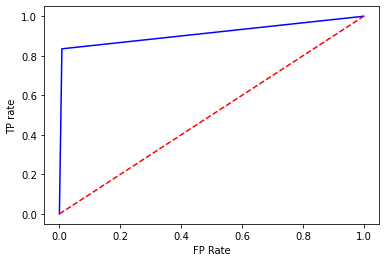

In [19]:
fpr, tpr, thresholds = roc_curve(y5_test,predictions_log)
plt.plot(fpr, tpr, 'b')
plt.plot([0,1],[0,1], 'r--')
plt.ylabel('TP rate')
plt.xlabel('FP Rate')
plt.show()

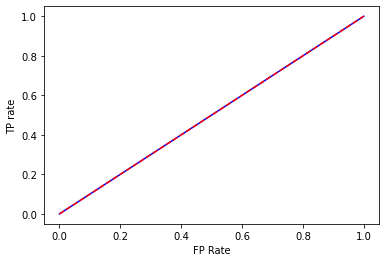

In [20]:
fpr, tpr, thresholds = roc_curve(y5_train,predictions_never_5)
plt.plot(fpr, tpr, 'b')
plt.plot([0,1],[0,1], 'r--')
plt.ylabel('TP rate')
plt.xlabel('FP Rate')
plt.show()

### Now find the roc_auc_score for each. 

In [21]:
print('ROC AUC score for LR ',roc_auc_score(y5_test,predictions_log))

ROC AUC score for LR  0.9135385341029717


In [22]:
print('ROC AUC score for Never 5 Classifier ',roc_auc_score(y5_train,predictions_never_5))

ROC AUC score for Never 5 Classifier  0.5


### What does this metric tell you? Which classifier works better with this metric in mind?